In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_stata('Cash_and_Childhood_Development_Replication/macoursetal_main.dta')  

Variables que considerem en la predicció inicial:
- hogarid_old: household ID in 2005
- cp_old:Person code 2005
- unique_05: communityid
- s1age_head_05: age for the household head at time of interview 
- s1hhsize_05 : household size
- s1hhsz_undr5_05s: # people under 5 yrs in hh
- 1hhsz_5_14_05:  # people between 5 and 15 in hh
- s1hhsz_15_24_05: # people between 15 and 25 in hh
- s1hhsz_25_64_05: # people between 25 and 65 in hh
- s1hhsz_65plus_05: # people 65 yrs and over in hh
- s1male_head_05: gender of hh head        (categorical)
- s2mother_inhs_05:mother of this person lives in the household
- s3ap5_rooms_h_05:number of rooms
- s3ap23_stime_h_05:time to prim. school, hrs
- s3ap24_htime_h_05:time to health center, hrs
- s3ap25_hqtime_h_05: time to municipal hq, hrs
- s3atoilet_hh_05: household has a toilet for waste disposal
- s3awater_access_hh_05:Access to piped water within property
- s3aelectric_hh_05: Access to electricity
- s4p6_vitamina_i_05: vitamin A in last 6 mos,under 5y         (categorical)
- s4p7_parasite_i_06: Got deworming medicine in last 6 months     (categorical)
- s11ownland_hh_05: hh owns land
- cons_food_pc_05: annual pc total food consumption
- cons_tot_pc_05: pc consumption aggregate
- tvip_05: TVIP Raw score
- height_05: Height-for-age z-score
- a10whz_05: weight for height z-score
- weight_05: Weight-for_age z_score
- age_transfer: Age in months at time of first transfer
- itt_i: Intent to treat
- itt_all_i: Intent to treat - 4 cat
- yrsedfath: Years of education of father
- bweight: Birth weight
- cpmom_06: Person code mother 2008
- T: =1 for treatment communities; = 0 for control
- male: =1 for boys, =0 for girls
- TREAT1:itt_all_i==Control
- TREAT2:itt_all_i==Bono Basico
- TREAT3:itt_all_i==Bono+Training
- TREAT4:itt_all_i==Bono+Grant
- ed_mom: Number of years of education mother at baseline
- MUN1: Municipal dummy 1
- MUN2: Municipal dummy 2
- MUN3: Municipal dummy 3
- MUN4: Municipal dummy 4
- MUN5: Municipal dummy 5
- MUN6: Municipal dummy 6
- com_haz_05: community average baseline height-for-age
- com_waz_05: community average baseline weight-for-age
- com_tvip_05: Community average baseline tvip score
- com_control_05: Community average baseline weight controls
- com_vit_05: Community average children received vitamins
- com_deworm_05: Community average children received deworming medicine
- com_notvip: Share of children in community without tvip score at baseline
- sample06:=1 for children with at least one test in 2006
- vitamiron_06: Got vitamin or iron in last 6 months
- weighted_05: Weighed in last 6 months
- propfood_05: % food in total expenditures
- prstap_f_05: % staples in total food expenditures
- pranimalprot_f_05: % animal proteins in total food expenditures
- prfruitveg_f_05: % fruit and vegetables in total food expenditures

In [4]:
df1=df[["hogarid_old","cp_old","unique_05","s1age_head_05","s1hhsize_05","s1hhsz_undr5_05","s1hhsz_5_14_05",
        "s1hhsz_15_24_05","s1hhsz_25_64_05","s1hhsz_65plus_05","s1male_head_05","s2mother_inhs_05","s3ap5_rooms_h_05",
        "s3ap23_stime_h_05","s3ap24_htime_h_05","s3ap25_hqtime_h_05","s3atoilet_hh_05","s3awater_access_hh_05",
        "s3aelectric_hh_05","s4p6_vitamina_i_05","s4p7_parasite_i_05","s11ownland_hh_05","cons_food_pc_05","cons_tot_pc_05",
        "tvip_05","height_05","a10whz_05","weight_05","itt_i","itt_all_i","yrsedfath","age_transfer","bweight",
        "s4p7_parasite_i_06","cpmom_06","T","male","TREAT1","TREAT2","TREAT3","TREAT4","ed_mom","MUN1","MUN2","MUN3","MUN4",
        "MUN5","MUN6","com_haz_05","com_waz_05","com_tvip_05","com_control_05","com_vit_05","com_deworm_05","com_notvip",
        "sample06","vitamiron_06","weighted_05","propfood_05","prstap_f_05","pranimalprot_f_05","prfruitveg_f_05"]]

In [5]:
df1.rename(columns = {'T':'tr'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Outcomes que considerem inicialment:

- hogarid_old: Full 2008 household ID
- cp_old: Person code 2005
- unique_05: communityid
- a5sscore_i_06:TVIP standardized score
- a6smemory_p1_06: standardize score McCarthy memory 1st part
- a6smemory_p2_06: standardize score McCarthy memory 2nd part
- a7a_delay_06: personal-social skills: delayed for age
- a7b_delay_06: language skills: delayed for age
- a7c_delay_06: fine motor skills: delayed for age
- a7d_delay_06: gross motor skills: delayed for age
- a9sgrossmotor_06: standardize score McCarthy gross motor
- height_06: height for age z-score (antrop age)
- weight_06: weight for age z-score(antrop age)
- cpmom_06: Person code mother 2006
- z_tvip_06: z-score tvip 2006
- z_social_06: z-score denver social-personal score 2006
- z_language_06: z-score denver language score 2006
- z_finmotor_06: z-score denver fine motor score 2006
- z_memory_06: z-score memory for numbers score 2006
- z_grmotor_06: z-score denver gross motor score 2006
- z_legmotor_06: z-score leg motor score 2006
- z_behavior_06: z-score behavioral problem index 2006
- z_height_06: z-score height-for-age 2006
- z_weight_06: z-score weight-for-age 2006
- z_all_06: z-score of sum of all tests 2006

In [6]:
# "hogarid_old","cp_old","unique_05", "cpmom_06" seran usats com a index
df_out=df[["a5sscore_i_06","a6smemory_p1_06","a6smemory_p2_06","a7a_delay_06","a7b_delay_06",
        "a7c_delay_06","a7d_delay_06","a9sgrossmotor_06","height_06","weight_06","z_tvip_06","z_social_06",
        "z_language_06","z_finmotor_06","z_memory_06","z_grmotor_06","z_legmotor_06","z_behavior_06","z_height_06",
        "z_weight_06","z_all_06"]]


# PRIOR VARIABLE EXPLORATION

## Outcome variables 

In [382]:
df_out

,a5sscore_i_06,a6smemory_p1_06,a6smemory_p2_06,a7a_delay_06,a7b_delay_06,a7c_delay_06,a7d_delay_06,a9sgrossmotor_06,height_06,weight_06,...,z_social_06,z_language_06,z_finmotor_06,z_memory_06,z_grmotor_06,z_legmotor_06,z_behavior_06,z_height_06,z_weight_06,z_all_06
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,82.0,-0.294118,-0.166667,0.0,0.0,0.0,0.0,1.041667,-1.466107,-1.023752,...,0.718433,0.710992,0.589500,0.428064,0.519089,0.884574,0.710875,-0.188809,-0.057639,0.450156
2,61.0,-1.444444,-0.937500,1.0,1.0,0.0,0.0,-0.250000,-0.832335,-0.381058,...,-0.248101,0.261394,0.589500,-0.012619,0.519089,0.553404,-2.688757,0.332960,0.460383,0.011252
3,55.0,-3.111111,-0.937500,1.0,1.0,1.0,1.0,0.750000,-1.540756,-1.194815,...,-0.248101,-1.087400,-2.478559,-1.334668,-0.628596,1.215745,-0.073655,-0.250266,-0.195518,-0.505333
4,NaN,NaN,NaN,1.0,1.0,1.0,0.0,NaN,-2.187729,-2.005400,...,-0.248101,0.261394,-1.711544,NaN,0.519089,NaN,NaN,-0.782903,-0.848862,-0.468488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [539]:
nan_rows=df_out[df.age_transfer<-11].index
dftj_out=df_out.drop(nan_rows)

In [540]:
dftj_out.isnull().sum().sort_values()

z_all_06             344
a7a_delay_06         362
z_social_06          363
a7b_delay_06         382
z_language_06        383
a7c_delay_06         404
z_finmotor_06        405
a7d_delay_06         416
z_grmotor_06         417
z_height_06          588
height_06            588
weight_06            588
z_weight_06          588
a9sgrossmotor_06    1815
a6smemory_p1_06     1828
z_legmotor_06       1832
a5sscore_i_06       1838
z_memory_06         1843
z_tvip_06           1853
z_behavior_06       2050
a6smemory_p2_06     2300
dtype: int64

In [383]:
len(df_out[df_out.isnull().all(axis=1)].index) #quants individus tenen NaN a totes les columnes (1074)

1181

In [384]:
df_out.isnull().sum().sort_values() #quants nulls hi ha per columna (variable)

z_all_06            1185
a7a_delay_06        1200
z_social_06         1204
a7b_delay_06        1220
z_language_06       1224
a7c_delay_06        1242
z_finmotor_06       1246
a7d_delay_06        1254
z_grmotor_06        1258
z_height_06         1429
height_06           1429
weight_06           1429
z_weight_06         1429
a9sgrossmotor_06    2656
a6smemory_p1_06     2669
z_legmotor_06       2673
a5sscore_i_06       2679
z_memory_06         2684
z_tvip_06           2694
z_behavior_06       2891
a6smemory_p2_06     3141
dtype: int64

In [385]:
df_out.isnull().sum(axis=1) #NaNs per fila (individu)

0       21
1        0
2        0
3        0
4        8
        ..
4506    21
4507    21
4508    21
4509    21
4510    21
Length: 4511, dtype: int64

(array([1446.,  137.,   47.,  193.,   39.,    8.,    7., 1347.,    6.,
          45.,    5.,   11.,    8.,    6.,    4.,    4.,    8.,    0.,
           9., 1181.]),
 array([ 0.  ,  1.05,  2.1 ,  3.15,  4.2 ,  5.25,  6.3 ,  7.35,  8.4 ,
         9.45, 10.5 , 11.55, 12.6 , 13.65, 14.7 , 15.75, 16.8 , 17.85,
        18.9 , 19.95, 21.  ]),
 <BarContainer object of 20 artists>)

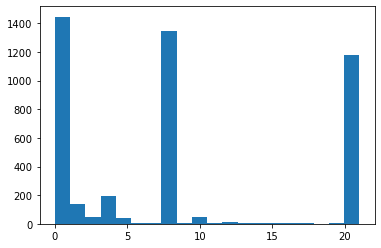

In [386]:
plt.hist(df_out.isnull().sum(axis=1), bins=20)  

In [387]:
df_out.isnull().sum(axis=1).value_counts()

8     1347
21    1181
0      976
1      470
4      193
2      137
3       47
10      45
5       39
12      11
19       9
17       8
13       8
6        8
7        7
9        6
14       6
11       5
16       4
15       4
dtype: int64

Veiem que a la majoria els hi falten 8 o 21 o 1 outcomes, mirem si són els mateixos a tots, i en aquest cas si té alguna explicació. 
- Als que els n'hi falten 22, els hi falten dades per totes les variables.
- Als que els n'hi falten 8, els hi falten dades per les variables "a5sscore_i_06","a6smemory_p1_06", "a9sgrossmotor_06", "z_tvip_06", "z_memory_06", "z_legmotor_06", "z_behavior_06". És a dir, no se'ls hi ha pogut fer el test de memòria de McCarthy, el TVIP, el Denver Social-Personal i el McCarthy motor.
- Als que  els hi falta una sola variable, els falta o bé la 2a part del test de memòria de McCarthy, o el test de Denver social-personal.
Com veiem en els hostogrames, els NaNs estan estretament relacionats amb l'edat del subjecte.

In [388]:
df_out[df_out.isnull().sum(axis=1)==8].isnull().sum()

a5sscore_i_06       1343
a6smemory_p1_06     1346
a6smemory_p2_06     1347
a7a_delay_06           0
a7b_delay_06           0
a7c_delay_06           0
a7d_delay_06           3
a9sgrossmotor_06    1346
height_06              1
weight_06              2
z_tvip_06           1343
z_social_06            0
z_language_06          0
z_finmotor_06          0
z_memory_06         1346
z_grmotor_06           3
z_legmotor_06       1346
z_behavior_06       1347
z_height_06            1
z_weight_06            2
z_all_06               0
dtype: int64

In [389]:
df_out[df_out.isnull().sum(axis=1)==21].isnull().sum()

a5sscore_i_06       1181
a6smemory_p1_06     1181
a6smemory_p2_06     1181
a7a_delay_06        1181
a7b_delay_06        1181
a7c_delay_06        1181
a7d_delay_06        1181
a9sgrossmotor_06    1181
height_06           1181
weight_06           1181
z_tvip_06           1181
z_social_06         1181
z_language_06       1181
z_finmotor_06       1181
z_memory_06         1181
z_grmotor_06        1181
z_legmotor_06       1181
z_behavior_06       1181
z_height_06         1181
z_weight_06         1181
z_all_06            1181
dtype: int64

In [390]:
df_out[df_out.isnull().sum(axis=1)==1].isnull().sum()

a5sscore_i_06         0
a6smemory_p1_06       0
a6smemory_p2_06     323
a7a_delay_06          0
a7b_delay_06          0
a7c_delay_06          0
a7d_delay_06          0
a9sgrossmotor_06      0
height_06             0
weight_06             0
z_tvip_06             0
z_social_06           0
z_language_06         0
z_finmotor_06         0
z_memory_06           0
z_grmotor_06          0
z_legmotor_06         0
z_behavior_06       147
z_height_06           0
z_weight_06           0
z_all_06              0
dtype: int64

(array([63., 34., 39., 35., 32., 28., 38., 27., 36., 42., 39., 71., 45.,
        30., 39., 35., 34., 49., 39., 40., 40., 43., 34., 77., 34., 34.,
        27., 38., 48., 42., 42., 46., 31.,  6.,  0.,  3.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.]),
 array([-9.        , -7.9142857 , -6.8285713 , -5.742857  , -4.6571426 ,
        -3.5714285 , -2.4857142 , -1.4       , -0.31428573,  0.7714286 ,
         1.8571428 ,  2.942857  ,  4.0285716 ,  5.114286  ,  6.2       ,
         7.285714  ,  8.3714285 ,  9.457143  , 10.542857  , 11.6285715 ,
        12.714286  , 13.8       , 14.885715  , 15.971429  , 17.057142  ,
        18.142857  , 19.22857   , 20.314285  , 21.4       , 22.485714  ,
        23.571428  , 24.657143  , 25.742857  , 26.828571  , 27.914286  ,
        29.        , 30.085714  , 31.171429  , 32.25714   , 33.342857  ,
        34.42857

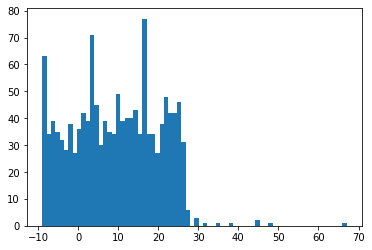

In [391]:
plt.hist(df1[df_out.isnull().sum(axis=1)==8].age_transfer, bins=70)

(array([ 5., 22., 17., 48., 32., 86., 72., 35., 52., 28., 77., 65., 30.,
        69., 30., 56., 34., 80., 76., 22.,  6.,  7.,  8., 12.,  5.,  3.,
         3., 14.,  2.,  4.,  4.,  2.,  9.,  2.,  2.,  3.,  3.,  3.,  0.,
         4.,  3.,  3.,  1.,  2.,  4.,  3.,  2.,  5.,  2.,  3.,  3.,  2.,
         1.,  0.,  3.,  4.,  4.,  3.,  7.,  6.,  4.,  1.,  2.,  5.,  5.,
         1.,  8.,  0.,  6., 10.]),
 array([-40.        , -38.414288  , -36.82857   , -35.24286   ,
        -33.657143  , -32.07143   , -30.485714  , -28.9       ,
        -27.314285  , -25.72857   , -24.142857  , -22.557142  ,
        -20.971428  , -19.385714  , -17.8       , -16.214285  ,
        -14.6285715 , -13.042857  , -11.457143  ,  -9.8714285 ,
         -8.285714  ,  -6.7       ,  -5.114286  ,  -3.5285714 ,
         -1.9428571 ,  -0.35714287,   1.2285714 ,   2.8142858 ,
          4.4       ,   5.9857144 ,   7.571429  ,   9.157143  ,
         10.742857  ,  12.328571  ,  13.914286  ,  15.5       ,
         17.085714  ,  1

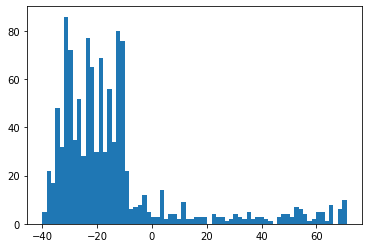

In [392]:
plt.hist(df1[df_out.isnull().sum(axis=1)==21].age_transfer, bins=70)

(array([10., 14.,  0., 26., 12.,  0.,  7., 20.,  0., 12.,  0., 12., 13.,
         0., 17., 17.,  0., 17.,  0., 12., 13.,  0., 17., 11.,  0., 18.,
         0., 20., 14.,  0., 14.,  7.,  0.,  8.,  0., 13., 10.,  0.,  8.,
         8.,  0.,  8., 10.,  0.,  5.,  0., 16., 10.,  0.,  9.,  5.,  0.,
        12.,  0.,  6.,  7.,  0.,  4.,  4.,  0.,  5.,  0.,  5.,  4.,  0.,
         2.,  3.,  0.,  2.,  3.]),
 array([27.      , 27.62857 , 28.257143, 28.885714, 29.514286, 30.142857,
        30.77143 , 31.4     , 32.028572, 32.657143, 33.285713, 33.914288,
        34.54286 , 35.17143 , 35.8     , 36.42857 , 37.057144, 37.685715,
        38.314285, 38.942856, 39.57143 , 40.2     , 40.82857 , 41.45714 ,
        42.085712, 42.714287, 43.342857, 43.971428, 44.6     , 45.228573,
        45.857143, 46.485714, 47.114285, 47.74286 , 48.37143 , 49.      ,
        49.62857 , 50.25714 , 50.885715, 51.514286, 52.142857, 52.771427,
        53.4     , 54.028572, 54.657143, 55.285713, 55.914288, 56.54286 ,
        

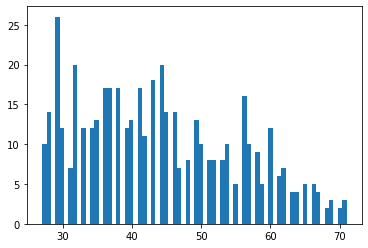

In [393]:
plt.hist(df1[df_out.isnull().sum(axis=1)==1].age_transfer, bins=70)

(array([ 6., 13.,  0.,  7.,  9.,  0., 19., 11.,  0., 12.,  0., 12., 12.,
         0., 18., 13.,  0., 18.,  0., 21., 13.,  0., 18., 24.,  0., 13.,
         0., 20., 18.,  0., 20., 21.,  0., 33.,  0., 32., 24.,  0., 30.,
        23.,  0., 28., 25.,  0., 26.,  0., 34., 34.,  0., 41., 34.,  0.,
        38.,  0., 32., 34.,  0., 30., 32.,  0., 32.,  0., 33., 15.,  0.,
        18., 11.,  0., 11.,  8.]),
 array([27.      , 27.62857 , 28.257143, 28.885714, 29.514286, 30.142857,
        30.77143 , 31.4     , 32.028572, 32.657143, 33.285713, 33.914288,
        34.54286 , 35.17143 , 35.8     , 36.42857 , 37.057144, 37.685715,
        38.314285, 38.942856, 39.57143 , 40.2     , 40.82857 , 41.45714 ,
        42.085712, 42.714287, 43.342857, 43.971428, 44.6     , 45.228573,
        45.857143, 46.485714, 47.114285, 47.74286 , 48.37143 , 49.      ,
        49.62857 , 50.25714 , 50.885715, 51.514286, 52.142857, 52.771427,
        53.4     , 54.028572, 54.657143, 55.285713, 55.914288, 56.54286 ,
        

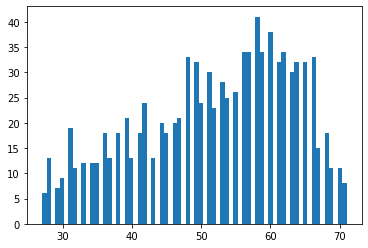

In [394]:
plt.hist(df1[df_out.isnull().sum(axis=1)==0].age_transfer, bins=70)

Deixant de banda els NaNs, explorem la relació entre la variable treatment i els diferents outcomes. 

In [7]:
df_violin=pd.concat([df1, df_out])
df_violin["ct"]=0

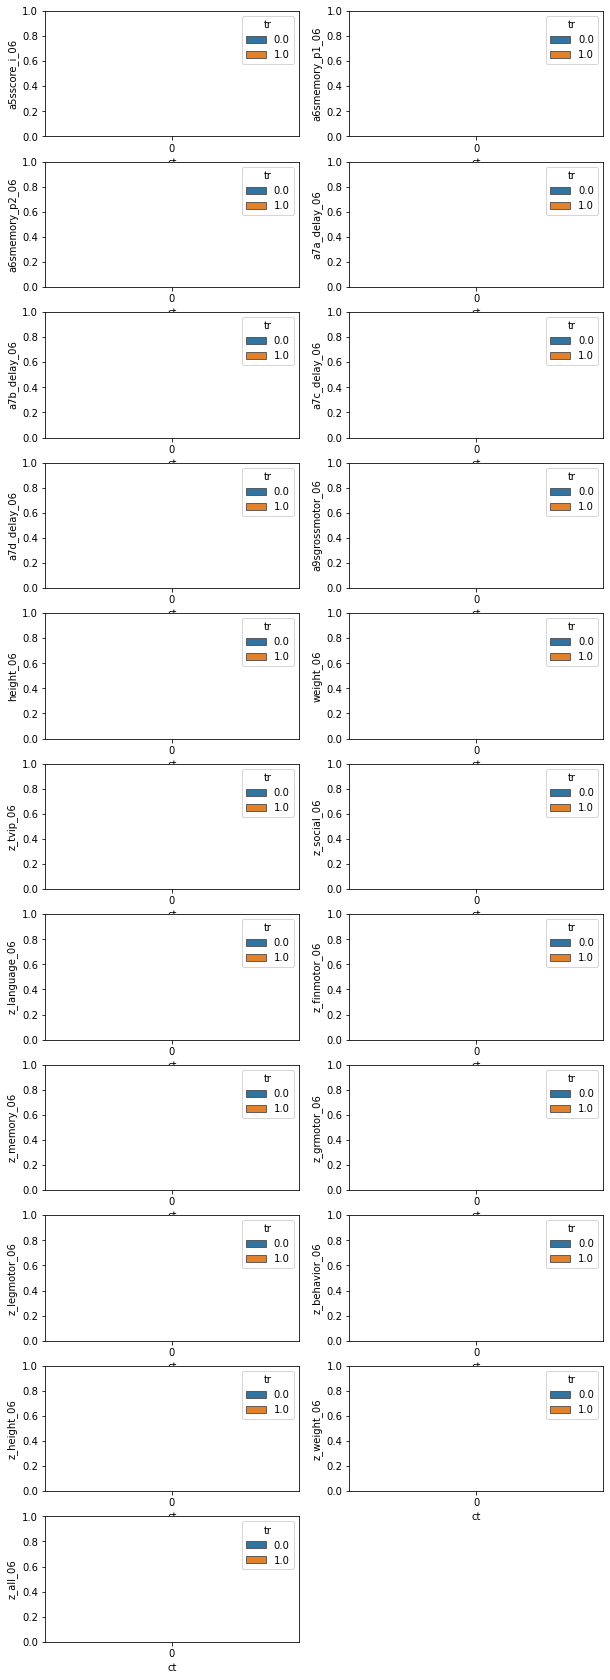

In [8]:
import seaborn as sns
col=df_out.columns
plt.figure(figsize=(10,30))
for i in range(21):
    plt.subplot(11,2,i+1)
    sns.violinplot(x="ct", y=col[i], hue="tr", data=df_violin, split=True, width=0.5)
    

# Income variables

In [397]:
df1=df[["hogarid_old","cp_old","unique_05","s1age_head_05","s1hhsize_05","s1hhsz_undr5_05","s1hhsz_5_14_05",
        "s1hhsz_15_24_05","s1hhsz_25_64_05","s1hhsz_65plus_05","s1male_head_05","s2mother_inhs_05","s3ap5_rooms_h_05",
        "s3ap23_stime_h_05","s3ap24_htime_h_05","s3ap25_hqtime_h_05","s3atoilet_hh_05","s3awater_access_hh_05",
        "s3aelectric_hh_05","s4p6_vitamina_i_05","s4p7_parasite_i_05","s11ownland_hh_05","cons_food_pc_05","cons_tot_pc_05",
        "tvip_05","height_05","a10whz_05","weight_05","itt_i","itt_all_i","yrsedfath","age_transfer","bweight",
        "s4p7_parasite_i_06","cpmom_06","T","male","TREAT1","TREAT2","TREAT3","TREAT4","ed_mom","MUN1","MUN2","MUN3","MUN4",
        "MUN5","MUN6","com_haz_05","com_waz_05","com_tvip_05","com_control_05","com_vit_05","com_deworm_05","com_notvip",
        "sample06","vitamiron_06","weighted_05","propfood_05","prstap_f_05","pranimalprot_f_05","prfruitveg_f_05"]]

In [398]:
df05=df1[["bweight","s4p7_parasite_i_06","cpmom_06","T","male","TREAT1","TREAT2","TREAT3","TREAT4","ed_mom","MUN1","MUN2","MUN3","MUN4",
        "MUN5","MUN6","com_haz_05","com_waz_05","com_tvip_05","com_control_05","com_vit_05","com_deworm_05","com_notvip",
        "sample06","vitamiron_06","weighted_05","propfood_05","prstap_f_05","pranimalprot_f_05","prfruitveg_f_05"]]

## Correlació

In [555]:
corr=df05.corr()
corr=abs(corr)
corr.style.background_gradient(cmap='coolwarm')

,bweight,cpmom_06,T,male,TREAT1,TREAT2,TREAT3,TREAT4,ed_mom,MUN1,MUN2,MUN3,MUN4,MUN5,MUN6,com_haz_05,com_waz_05,com_tvip_05,com_control_05,com_vit_05,com_deworm_05,com_notvip,sample06,vitamiron_06,weighted_05,propfood_05,prstap_f_05,pranimalprot_f_05,prfruitveg_f_05
bweight,1.000000,0.026613,0.001863,0.065408,0.001863,0.027440,0.021469,0.003473,0.034934,0.048556,0.019788,0.096545,0.037965,0.044620,0.069685,0.107494,0.102040,0.057371,0.023879,0.034250,0.024574,0.023726,0.000118,0.003705,0.035054,0.030219,0.026247,0.037077,0.019918
cpmom_06,0.026613,1.000000,0.009073,0.011106,0.009073,0.007441,0.013498,0.002562,0.105917,0.111659,0.023851,0.043588,0.045132,0.031877,0.097608,0.069493,0.073217,0.006665,0.038916,0.025939,0.035888,0.000479,0.061695,0.035880,0.005111,0.032821,0.065233,0.024149,0.042272
T,0.001863,0.009073,1.000000,0.010536,1.000000,0.314889,0.337121,0.339876,0.022293,0.030009,0.010950,0.030940,0.007125,0.014042,0.006854,0.128714,0.137827,0.136030,0.149055,0.177588,0.222539,0.033078,0.016217,0.082937,0.037900,0.058905,0.002103,0.011454,0.010032
male,0.065408,0.011106,0.010536,1.000000,0.010536,0.010992,0.004981,0.005227,0.012178,0.012561,0.001339,0.000761,0.000417,0.004879,0.010640,0.013753,0.028122,0.008922,0.014326,0.012551,0.009061,0.034999,0.008865,0.013502,0.000123,0.007637,0.001864,0.011584,0.003751
TREAT1,0.001863,0.009073,1.000000,0.010536,1.000000,0.314889,0.337121,0.339876,0.022293,0.030009,0.010950,0.030940,0.007125,0.014042,0.006854,0.128714,0.137827,0.136030,0.149055,0.177588,0.222539,0.033078,0.016217,0.082937,0.037900,0.058905,0.002103,0.011454,0.010032
TREAT2,0.027440,0.007441,0.314889,0.010992,0.314889,1.000000,0.326312,0.328978,0.039126,0.007003,0.027616,0.014299,0.012910,0.024272,0.009740,0.022348,0.024489,0.060800,0.038951,0.060365,0.071286,0.018289,0.010850,0.035268,0.031923,0.000131,0.016889,0.032060,0.019006
TREAT3,0.021469,0.013498,0.337121,0.004981,0.337121,0.326312,1.000000,0.352205,0.010437,0.001168,0.007322,0.009633,0.005932,0.007717,0.000163,0.051751,0.056871,0.034631,0.043031,0.054616,0.080250,0.034566,0.011600,0.024744,0.006758,0.017750,0.004024,0.030942,0.003933
TREAT4,0.003473,0.002562,0.339876,0.005227,0.339876,0.328978,0.352205,1.000000,0.048803,0.021467,0.008562,0.026117,0.011358,0.001925,0.015917,0.052916,0.054673,0.040131,0.065534,0.061314,0.069263,0.015538,0.016986,0.023301,0.013697,0.040019,0.014331,0.011144,0.012429
ed_mom,0.034934,0.105917,0.022293,0.012178,0.022293,0.039126,0.010437,0.048803,1.000000,0.203739,0.026716,0.094148,0.098566,0.005409,0.201512,0.281294,0.240190,0.092838,0.061844,0.021189,0.016931,0.100671,0.073442,0.003183,0.085312,0.273161,0.219765,0.255206,0.059050
MUN1,0.048556,0.111659,0.030009,0.012561,0.030009,0.007003,0.001168,0.021467,0.203739,1.000000,0.111987,0.238603,0.338359,0.224272,0.337269,0.631204,0.501341,0.085725,0.026026,0.039973,0.016715,0.076292,0.004324,0.002063,0.008127,0.216532,0.143090,0.142534,0.037254


In [556]:
corr=df1.corr()
corr=abs(corr)
corr.style.background_gradient(cmap='coolwarm')

,hogarid_old,cp_old,unique_05,s1age_head_05,s1hhsize_05,s1hhsz_undr5_05,s1hhsz_5_14_05,s1hhsz_15_24_05,s1hhsz_25_64_05,s1hhsz_65plus_05,s2mother_inhs_05,s3ap5_rooms_h_05,s3ap23_stime_h_05,s3ap24_htime_h_05,s3ap25_hqtime_h_05,cons_food_pc_05,cons_tot_pc_05,tvip_05,height_05,a10whz_05,weight_05,yrsedfath,age_transfer,bweight,cpmom_06,T,male,TREAT1,TREAT2,TREAT3,TREAT4,ed_mom,MUN1,MUN2,MUN3,MUN4,MUN5,MUN6,com_haz_05,com_waz_05,com_tvip_05,com_control_05,com_vit_05,com_deworm_05,com_notvip,sample06,vitamiron_06,weighted_05,propfood_05,prstap_f_05,pranimalprot_f_05,prfruitveg_f_05
hogarid_old,1.000000,0.035171,0.078656,0.008461,0.045730,0.025587,0.025536,0.040345,0.040230,0.037283,0.015447,0.027901,0.018332,0.080054,0.057877,0.091881,0.125139,0.013935,0.032336,0.013742,0.008050,0.008108,0.015585,0.027373,0.046064,0.100494,0.023238,0.100494,0.015474,0.047533,0.036114,0.052216,0.066805,0.121325,0.104448,0.294415,0.144837,0.079699,0.076768,0.039864,0.028855,0.190084,0.339012,0.344778,0.184918,0.019113,0.047823,0.046006,0.117185,0.097113,0.089483,0.119271
cp_old,0.035171,1.000000,0.061925,0.521741,0.917750,0.292490,0.707163,0.502381,0.590757,0.146206,0.116521,0.163295,0.028262,0.000182,0.011040,0.144699,0.214501,0.100323,0.098060,0.054662,0.104194,0.045580,0.098189,0.055621,0.587112,0.007482,0.027147,0.007482,0.034501,0.004471,0.021343,0.157384,0.025164,0.031889,0.035802,0.053817,0.031355,0.038897,0.083965,0.068768,0.065105,0.021722,0.017498,0.019846,0.026359,0.036841,0.019718,0.025877,0.208675,0.145849,0.073514,0.073968
unique_05,0.078656,0.061925,1.000000,0.023687,0.078316,0.115271,0.061836,0.015531,0.047297,0.049922,0.075365,0.132543,0.091149,0.242900,0.182119,0.107845,0.166695,0.148704,0.224009,0.023090,0.172398,0.102042,0.005697,0.125500,0.014278,0.015425,0.008583,0.015425,0.021515,0.012797,0.007140,0.215070,0.317003,0.339829,0.729333,0.433025,0.282073,0.416716,0.551994,0.520361,0.267815,0.003141,0.414374,0.250760,0.262992,0.000486,0.006023,0.005119,0.158805,0.189008,0.309906,0.021083
s1age_head_05,0.008461,0.521741,0.023687,1.000000,0.513081,0.016801,0.201327,0.326839,0.469491,0.548293,0.176261,0.221033,0.022332,0.091215,0.066475,0.060251,0.079340,0.005207,0.011592,0.011354,0.001859,0.110716,0.014276,0.010244,0.490688,0.033096,0.011458,0.033096,0.016042,0.013440,0.003567,0.064217,0.099833,0.053978,0.009678,0.031182,0.015582,0.097449,0.058579,0.055383,0.005224,0.010058,0.019290,0.047077,0.016740,0.035934,0.021817,0.015771,0.068895,0.003436,0.025648,0.036723
s1hhsize_05,0.045730,0.917750,0.078316,0.513081,1.000000,0.409181,0.703613,0.531419,0.646196,0.187550,0.082592,0.196121,0.031690,0.001372,0.001947,0.158329,0.233203,0.119291,0.134596,0.051713,0.117117,0.018914,0.033728,0.049752,0.587361,0.005622,0.026787,0.005622,0.034770,0.011649,0.016349,0.114338,0.017577,0.046950,0.051194,0.070092,0.058466,0.053429,0.090142,0.075480,0.064221,0.023943,0.015812,0.010614,0.057232,0.002737,0.003218,0.041343,0.205960,0.157909,0.073924,0.104500
s1hhsz_undr5_05,0.025587,0.292490,0.115271,0.016801,0.409181,1.000000,0.103757,0.042228,0.147930,0.007793,0.024595,0.022993,0.070297,0.098448,0.080539,0.130392,0.188690,0.202811,0.171547,0.034877,0.133756,0.110336,0.207394,0.086424,0.113975,0.000298,0.025636,0.000298,0.004218,0.006500,0.002708,0.193962,0.125462,0.011013,0.042165,0.002188,0.008857,0.182917,0.144893,0.139459,0.072980,0.036240,0.000357,0.005269,0.065294,0.172035,0.090854,0.064737,0.133228,0.125597,0.089989,0.049165
s1hhsz_5_14_05,0.025536,0.707163,0.061836,0.201327,0.703613,0.103757,1.000000,0.043466,0.342066,0.015094,0.050536,0.038495,0.008763,0.034486,0.028416,0.112389,0.184173,0.047337,0.196178,0.069665,0.168185,0.086122,0.061850,0.019770,0.187027,0.014280,0.011643,0.014280,0.040479,0.044706,0.008392,0.198997,0.083630,0.033904,0.002686,0.031793,0.034635,0.096927,0.125305,0.113642,0.023479,0.018437,0.006161,0.019446,0.034353,0.000451,0.026167,0.030094,0.244476,0.151104,0.089334,0.078345
s1hhsz_15_24_05,0.040345,0.502381,0.015531,0.326839,0.5

In [401]:
k=1
#print( "(",col[i+k],")", col.index[i+k]," - ", column,"\n")
high_corr=[]
for column in corr.columns:
    col=corr[column]
    for i in range(len(col)-k):
        if(col[i+k]>0.5):
            high_corr.append([col[i+k], col.index[i+k], column]) 
    k=k+1
high_corr_series=pd.Series([row[0] for row in high_corr], index=[row[1]+" - "+row[2] for row in high_corr])

In [402]:
high_corr_series.sort_values()

com_waz_05 - MUN1                         0.501341
s1hhsz_15_24_05 - cp_old                  0.502381
s1hhsize_05 - s1age_head_05               0.513081
com_waz_05 - unique_05                    0.520361
s1age_head_05 - cp_old                    0.521741
s1hhsz_15_24_05 - s1hhsize_05             0.531419
s1hhsz_65plus_05 - s1age_head_05          0.548293
com_haz_05 - unique_05                    0.551994
cpmom_06 - s1hhsz_15_24_05                0.552210
cpmom_06 - cp_old                         0.587112
cpmom_06 - s1hhsize_05                    0.587361
s1hhsz_25_64_05 - cp_old                  0.590757
s3ap25_hqtime_h_05 - s3ap24_htime_h_05    0.630219
com_haz_05 - MUN1                         0.631204
s1hhsz_25_64_05 - s1hhsize_05             0.646196
sample06 - age_transfer                   0.655035
pranimalprot_f_05 - prstap_f_05           0.664587
weight_05 - a10whz_05                     0.696645
s1hhsz_5_14_05 - s1hhsize_05              0.703613
s1hhsz_5_14_05 - cp_old        

Variables altament relacionades:

   - TREAT1 - T: Treatment1 i treatment, efectivament qui és tractat, com a mínim és tractat amb T1, i qui és tractat amb T1 és tractat.
    
   - cons_tot_pc_05 - cons_food_pc_05: gasto total i gasto en menjar.
    
   - s1hhsize_05 - cp_old: mida hh i codi personal
    
   - com_waz_05 - com_haz_05: community average baseline height-for-age vs community average baseline weight-for-age
    
   - weight_05 - height_05: pes i alçada.

Provem per altres mesures de correlació: spearman i kendall.

In [403]:
corr_kendall=df1.corr(method='kendall')
corr_kendall=abs(corr_kendall)
corr_kendall.style.background_gradient(cmap='coolwarm')

,hogarid_old,cp_old,unique_05,s1age_head_05,s1hhsize_05,s1hhsz_undr5_05,s1hhsz_5_14_05,s1hhsz_15_24_05,s1hhsz_25_64_05,s1hhsz_65plus_05,s2mother_inhs_05,s3ap5_rooms_h_05,s3ap23_stime_h_05,s3ap24_htime_h_05,s3ap25_hqtime_h_05,cons_food_pc_05,cons_tot_pc_05,tvip_05,height_05,a10whz_05,weight_05,yrsedfath,age_transfer,bweight,cpmom_06,T,male,TREAT1,TREAT2,TREAT3,TREAT4,ed_mom,MUN1,MUN2,MUN3,MUN4,MUN5,MUN6,com_haz_05,com_waz_05,com_tvip_05,com_control_05,com_vit_05,com_deworm_05,com_notvip,sample06,vitamiron_06,weighted_05,propfood_05,prstap_f_05,pranimalprot_f_05,prfruitveg_f_05
hogarid_old,1.000000,0.020947,0.094202,0.015516,0.031362,0.013574,0.016660,0.031416,0.039177,0.037829,0.012372,0.038643,0.027041,0.054102,0.035894,0.053270,0.091136,0.015816,0.023844,0.014683,0.002333,0.004216,0.010527,0.027093,0.026424,0.082350,0.019240,0.082350,0.012419,0.039103,0.029693,0.034940,0.053068,0.100045,0.083796,0.239543,0.119631,0.066374,0.055634,0.024510,0.045422,0.168120,0.222445,0.220311,0.093570,0.015226,0.039027,0.037797,0.074691,0.066014,0.062543,0.065540
cp_old,0.020947,1.000000,0.040287,0.479985,0.850874,0.187186,0.605742,0.274626,0.499411,0.111113,0.108077,0.134436,0.028563,0.016090,0.007419,0.140588,0.205449,0.053294,0.071208,0.026831,0.076134,0.029193,0.068136,0.032848,0.407268,0.010446,0.016214,0.010446,0.027476,0.005200,0.010920,0.132207,0.031297,0.034058,0.016129,0.036014,0.037736,0.053432,0.066556,0.058242,0.045527,0.025422,0.014936,0.018183,0.023472,0.013745,0.013346,0.019497,0.167817,0.100975,0.037761,0.045724
unique_05,0.094202,0.040287,1.000000,0.005599,0.042963,0.050898,0.032521,0.028990,0.042464,0.029265,0.063056,0.064753,0.000467,0.090626,0.003113,0.161334,0.189305,0.020514,0.159925,0.006946,0.111952,0.035309,0.008973,0.103119,0.007855,0.005622,0.001866,0.005622,0.006097,0.007298,0.006904,0.111729,0.361940,0.182017,0.472246,0.594208,0.222851,0.078824,0.383812,0.337299,0.023441,0.075175,0.250387,0.202894,0.145395,0.003797,0.013538,0.011151,0.080460,0.110992,0.213933,0.101623
s1age_head_05,0.015516,0.479985,0.005599,1.000000,0.464744,0.003854,0.225647,0.206494,0.449075,0.359581,0.146218,0.186897,0.015941,0.049804,0.040166,0.060947,0.088986,0.013892,0.001306,0.000141,0.003996,0.053808,0.008471,0.003204,0.449539,0.030953,0.008402,0.030953,0.016354,0.010400,0.004198,0.018253,0.076291,0.048019,0.012480,0.025848,0.015022,0.067274,0.032410,0.029686,0.002096,0.027993,0.015703,0.033047,0.008192,0.032801,0.017079,0.016681,0.068014,0.013291,0.020318,0.002522
s1hhsize_05,0.031362,0.850874,0.042963,0.464744,1.000000,0.277609,0.588778,0.313110,0.523610,0.145146,0.076939,0.153597,0.034938,0.016705,0.015937,0.192082,0.251784,0.059262,0.096780,0.030234,0.087747,0.012818,0.030420,0.030013,0.404064,0.009035,0.021974,0.009035,0.020685,0.004356,0.006721,0.092898,0.027001,0.043056,0.027219,0.042332,0.060354,0.072177,0.072915,0.066890,0.039361,0.026937,0.011265,0.010913,0.038564,0.007574,0.001652,0.035318,0.164431,0.109198,0.037720,0.061531
s1hhsz_undr5_05,0.013574,0.187186,0.050898,0.003854,0.277609,1.000000,0.045259,0.015502,0.064109,0.014671,0.013774,0.037414,0.040693,0.071626,0.070489,0.195306,0.233471,0.152996,0.132171,0.031718,0.110405,0.086725,0.157447,0.064470,0.026974,0.003664,0.022204,0.003664,0.007196,0.018714,0.008132,0.156387,0.126385,0.014039,0.033382,0.009782,0.007680,0.184890,0.118769,0.111013,0.066749,0.035914,0.000031,0.003107,0.053205,0.167447,0.085734,0.066134,0.098246,0.096684,0.070174,0.075255
s1hhsz_5_14_05,0.016660,0.605742,0.032521,0.225647,0.588778,0.045259,1.000000,0.037063,0.316598,0.018939,0.040612,0.033266,0.019499,0.033543,0.032037,0.114447,0.182943,0.012619,0.136192,0.045828,0.118009,0.052168,0.050699,0.011354,0.054623,0.006970,0.012530,0.006970,0.035814,0.044431,0.002977,0.153171,0.083791,0.024392,0.009861,0.022822,0.025963,0.089847,0.092181,0.085444,0.009482,0.000303,0.005072,0.008664,0.015663,0.001491,0.017790,0.023864,0.185894,0.110077,0.061824,0.042158
s1hhsz_15_24_05,0.031416,0.274626,0.028990,0.206494,0.3

In [404]:
k=1
#print( "(",col[i+k],")", col.index[i+k]," - ", column,"\n")
high_corr_k=[]
for column in corr_kendall.columns:
    col=corr_kendall[column]
    for i in range(len(col)-k):
        if(col[i+k]>0.5):
            high_corr_k.append([col[i+k], col.index[i+k], column]) 
    k=k+1
high_corr_k_series=pd.Series([row[0] for row in high_corr_k], index=[row[1]+" - "+row[2] for row in high_corr_k])
high_corr_k_series.sort_values()

sample06 - age_transfer                   0.523202
s1hhsz_25_64_05 - s1hhsize_05             0.523610
com_haz_05 - MUN1                         0.526786
weight_05 - a10whz_05                     0.529515
s3ap25_hqtime_h_05 - s3ap24_htime_h_05    0.539837
com_deworm_05 - com_vit_05                0.567326
weight_05 - height_05                     0.569494
s1hhsz_5_14_05 - s1hhsize_05              0.588778
MUN4 - unique_05                          0.594208
s1hhsz_5_14_05 - cp_old                   0.605742
com_waz_05 - com_haz_05                   0.690263
cons_tot_pc_05 - cons_food_pc_05          0.742154
s1hhsize_05 - cp_old                      0.850874
TREAT1 - T                                1.000000
dtype: float64

In [405]:
corr_sp=df1.corr(method='spearman')
corr_sp=abs(corr_sp)
corr_sp.style.background_gradient(cmap='coolwarm')

k=1
#print( "(",col[i+k],")", col.index[i+k]," - ", column,"\n")
high_corr_sp=[]
for column in corr_sp.columns:
    col=corr_sp[column]
    for i in range(len(col)-k):
        if(col[i+k]>0.5):
            high_corr_sp.append([col[i+k], col.index[i+k], column]) 
    k=k+1
high_corr_sp_series=pd.Series([row[0] for row in high_corr_sp], index=[row[1]+" - "+row[2] for row in high_corr_sp])
high_corr_sp_series.sort_values()

com_waz_05 - unique_05                    0.524321
s1hhsz_25_64_05 - s1age_head_05           0.535615
MUN3 - unique_05                          0.574174
cpmom_06 - s1age_head_05                  0.591148
s1hhsz_25_64_05 - cp_old                  0.592082
com_haz_05 - unique_05                    0.594705
s1hhsize_05 - s1age_head_05               0.611948
s1hhsz_25_64_05 - s1hhsize_05             0.621115
s1age_head_05 - cp_old                    0.628457
s3ap25_hqtime_h_05 - s3ap24_htime_h_05    0.628912
sample06 - age_transfer                   0.637752
com_haz_05 - MUN1                         0.640484
pranimalprot_f_05 - prstap_f_05           0.651872
s1hhsz_5_14_05 - s1hhsize_05              0.701547
s1hhsz_5_14_05 - cp_old                   0.711241
weight_05 - a10whz_05                     0.713498
MUN4 - unique_05                          0.722458
com_deworm_05 - com_vit_05                0.742241
weight_05 - height_05                     0.758025
com_waz_05 - com_haz_05        

## NaNs

Anem a veure ara els NaNs en cada variable i com imputar-los.

In [406]:
len(df05.columns)

30

In [551]:
df05

,bweight,s4p7_parasite_i_06,cpmom_06,T,male,TREAT1,TREAT2,TREAT3,TREAT4,ed_mom,...,com_vit_05,com_deworm_05,com_notvip,sample06,vitamiron_06,weighted_05,propfood_05,prstap_f_05,pranimalprot_f_05,prfruitveg_f_05
0,NaN,NaN,2.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,...,0.925926,0.629630,0.176471,0.0,NaN,NaN,0.764443,0.436193,0.390191,0.062652
1,5.94,no,2.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,...,0.571429,0.285714,0.500000,1.0,0.0,1.0,0.678527,0.204472,0.674387,0.000000
2,8.50,yes,7.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,...,0.685714,0.628571,0.250000,1.0,1.0,1.0,0.560299,0.706687,0.046980,0.009460
3,7.00,yes,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.861111,0.500000,0.300000,1.0,1.0,1.0,0.527724,0.418402,0.122034,0.135109
4,6.00,yes,8.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.861111,0.500000,0.300000,1.0,1.0,0.0,0.527724,0.418402,0.122034,0.135109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,3.0,...,0.872340,0.638298,0.105263,0.0,NaN,NaN,0.862824,0.562769,0.021828,0.000000
4507,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0,0.0,2.0,...,0.869565,0.608696,0.100000,0.0,NaN,NaN,0.733073,0.717335,0.112550,0.055846
4508,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,1.000000,1.000000,0.000000,0.0,NaN,NaN,0.871933,0.357003,0.419131,0.012866
4509,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0,0.0,3.0,...,0.914894,0.744681,0.400000,0.0,NaN,NaN,0.658000,0.731997,0.231074,0.002110


In [552]:
df05.isnull().sum(axis=1).value_counts()

0    2128
5     971
2     643
1     501
3     160
4      58
8       4
dtype: int64

Observem que hi ha 46 persones a les que els hi falten 25/26 de les 30 característiques. Possiblement caldria treure-les de la mostra. A la resta els falten poques característiques (0-5).

Eliminem aquests 46 i mirem els altres NaN.

In [409]:
df05[df05.isnull().sum(axis=1)>=25].head()

,bweight,s4p7_parasite_i_06,cpmom_06,T,male,TREAT1,TREAT2,TREAT3,TREAT4,ed_mom,...,com_vit_05,com_deworm_05,com_notvip,sample06,vitamiron_06,weighted_05,propfood_05,prstap_f_05,pranimalprot_f_05,prfruitveg_f_05
323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.742857,0.040289,0.009403
375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.444081,0.354060,0.015663
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.664376,0.218884,0.061201
513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.513210,0.196259,0.186003
539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000329,0.947823,0.031933


In [410]:
nan_rows=df05[df05.isnull().sum(axis=1)>=25].index
df05.drop(nan_rows, inplace=True)

C:\Users\Usuari\AppData\Local\Temp\ipykernel_15200\4098550589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df05.drop(nan_rows, inplace=True)


In [411]:
df05.isna().sum()[df05.isna().sum()>0].sort_values()

prstap_f_05             18
pranimalprot_f_05       18
prfruitveg_f_05         18
propfood_05            127
ed_mom                 257
vitamiron_06          1148
s4p7_parasite_i_06    1149
cpmom_06              1187
bweight               1598
weighted_05           1866
dtype: int64

Així doncs les variables amb NaN són:
- prstap_f_05: % staples in total food expenditures
- pranimalprot_f_05: % animal proteins in total food expenditures
- prfruitveg_f_05: % fruit and vegetables in total food expenditures  
- propfood_05: % food in total expenditures
        (Sembla que per falta de dades, en tot cas són 18 persones només. Caldria mirar perque hi mes Nans a propfood que a protprotein pe)
- ed_mom (Number of years of education mother at baseline)
        (257 NaNs, valdria la pena imputar-los(mitjana o mediana) a no ser que la variable sigui molt explicativa)
- vitamiron_06: Got vitamin or iron in last 6 months
        (Sembla que en aquest cas els Nulls es deuen a individus que van neixer després de fer el test age_transfer<0, vegi's histograma_n. (Caldria assignarlos-hi algun valor? Possiblement en un futur prenguin vitamines, tot i que això no tingui efecte en els nostres tests de desenvolupaments... segurament millor no imputar-los-hi valor. Imputem per families.))
- s4p7_parasite_i_06 (Got deworming medicine in last 6 months)
        (Exactament igual que en vitamiron_06, de fet ih ha practicament el mateix nombre de NaNs)
- cpmom_06: personal code mom 06
        (Els NaNs es troben majoritàriament 9 mesos abans de l'age_tranfer. Així només van anotar el cp per a aquelles mares que sabien que serien mares en el moment de la transferència. Vegi's histograma n+2)
- bweight:  (Birth weight)  
        (Veiem que passa igual que en la resta, la majoria de NaNs es troben per age_transfer<0, en aquest cas<5. No es devien anotar els pesos al neixament de nens nascuts després de donar l'ajuda. En aquest cas clarament podriem imputar la mitjana per als amb age_transfer>5, i veure com actuar amb la resta. Vegi's histograma n+1)
- weighted_05: Weighed in last 6 months
        (Passarà el mateix que amb els vitamin iron. Podriem imputar valors fent una regressió pes/temps potser?)
          

In [412]:
df1.drop(nan_rows, inplace=True)

C:\Users\Usuari\AppData\Local\Temp\ipykernel_15200\3266569917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(nan_rows, inplace=True)


Text(0.5, 1.0, 'histograma_n')

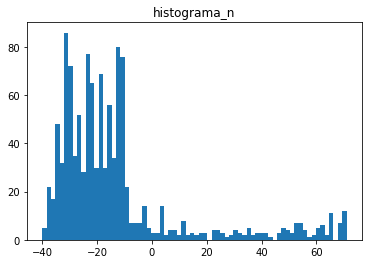

In [441]:
#histograma_n
plt.hist(df1[df05.vitamiron_06.isnull()].age_transfer, bins=70)
plt.title("histograma_n")
#plt.xlim(-40,-5)

(array([788.,   0.,   0.,   0.,  76.,   0.,   0.,   0., 377.,   0.,   0.,
          0.,   0., 562.,   0.,   0.,   0., 631.,   0.,   0.,   0., 320.,
          0.,   0.,   0.,   0., 830.,   0.,   0.,   0., 182.,   0.,   0.,
          0.,   0., 108.,   0.,   0.,   0., 116.,   0.,   0.,   0.,  52.,
          0.,   0.,   0.,   0., 125.,   0.,   0.,   0.,  15.,   0.,   0.,
          0.,   4.,   0.,   0.,   0.,   0.,   8.,   0.,   0.,   0.,   4.,
          0.,   0.,   0.,  10.]),
 array([ 0.        ,  0.22857143,  0.45714286,  0.6857143 ,  0.9142857 ,
         1.1428572 ,  1.3714286 ,  1.6       ,  1.8285714 ,  2.057143  ,
         2.2857144 ,  2.5142858 ,  2.7428572 ,  2.9714286 ,  3.2       ,
         3.4285715 ,  3.6571429 ,  3.8857143 ,  4.114286  ,  4.3428574 ,
         4.571429  ,  4.8       ,  5.0285716 ,  5.257143  ,  5.4857144 ,
         5.714286  ,  5.9428573 ,  6.1714287 ,  6.4       ,  6.6285715 ,
         6.857143  ,  7.0857143 ,  7.3142858 ,  7.542857  ,  7.7714286 ,
         8.

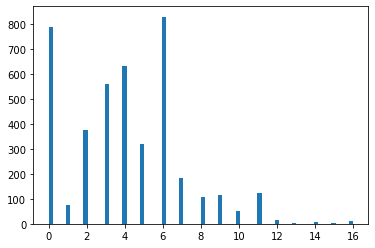

In [414]:
plt.hist(df05.ed_mom, bins=70)

In [415]:
df05.ed_mom.value_counts(dropna=False)

6.0     830
0.0     788
4.0     631
3.0     562
2.0     377
5.0     320
NaN     257
7.0     182
11.0    125
9.0     116
8.0     108
1.0      76
10.0     52
12.0     15
16.0     10
14.0      8
15.0      4
13.0      4
Name: ed_mom, dtype: int64

Text(0.5, 1.0, 'histograma_n+1')

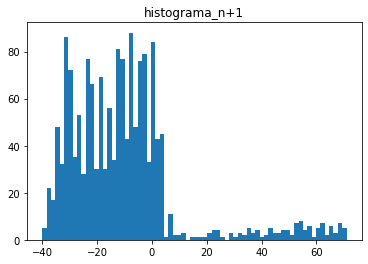

In [416]:
plt.hist(df1[df05.bweight.isnull()].age_transfer, bins=70)
plt.title("histograma_n+1")
#plt.xlim(-40,5)

Text(0.5, 1.0, 'histograma_n+2')

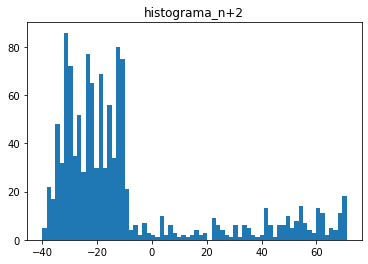

In [417]:
plt.hist(df1[df05.cpmom_06.isnull()].age_transfer, bins=70)
plt.title("histograma_n+2")
#plt.xlim(-40,0)

## Outliers 

Analitzem ara els outliers. Aplicarem els tests 3-sigma i IQR

In [418]:
df.cpmom_06.values

array([ 2.,  2.,  7., ..., nan, nan, nan])

In [452]:
def iqr(series):
    mild_outlier_indexes=[]
    extreme_outlier_indexes=[]
    q25 = np.nanpercentile(series.values, 25)
    q75 = np.nanpercentile(series.values, 75)
    iqrange = q75 - q25         #inter-quartile range
    for i in series.index:
        if(np.isnan(series[i])==False):
            if ((series[i]<(q25 - 1.5*iqrange)) or  ((q75 + 1.5*iqrange) < series[i])):
                mild_outlier_indexes.append(i)
            if ((series[i]<(q25 - 2*iqrange)) or  ((q75 + 2*iqrange) < series[i])):
                extreme_outlier_indexes.append(i)
    return mild_outlier_indexes,extreme_outlier_indexes

In [482]:
def sigma3(series):
    outlier_indexes=[]
    mean = np.nanmean(series.values)
    std= np.nanstd(series.values)
    for i in series.index:
        if(np.isnan(series[i])==False):
            if ((abs(series[i]-mean)>2.58*std)):
                outlier_indexes.append(i)
    return outlier_indexes

In [483]:
outlier_cols=["bweight","ed_mom","com_haz_05","com_waz_05","com_tvip_05","com_control_05","com_vit_05",
              "com_deworm_05","com_notvip","sample06","propfood_05","prstap_f_05","pranimalprot_f_05","prfruitveg_f_05"]

In [484]:
mild_outliers_n=[]
extreme_outliers_n=[]
    
for col in outlier_cols:
    mild, extreme=iqr(df05[col])
    mild_outliers_n.append(len(mild))
    extreme_outliers_n.append(len(extreme))
extreme_outliers_series=pd.Series(extreme_outliers_n, index=outlier_cols)
mild_outliers_series=pd.Series(mild_outliers_n, index=outlier_cols)

In [485]:
extreme_outliers_series

bweight               59
ed_mom                14
com_haz_05             0
com_waz_05             4
com_tvip_05          150
com_control_05        47
com_vit_05             0
com_deworm_05          4
com_notvip            80
sample06               0
propfood_05           24
prstap_f_05            0
pranimalprot_f_05     77
prfruitveg_f_05      128
dtype: int64

In [486]:
mild_outliers_series

bweight              126
ed_mom                26
com_haz_05            22
com_waz_05            45
com_tvip_05          188
com_control_05       239
com_vit_05             4
com_deworm_05         36
com_notvip           177
sample06               0
propfood_05           77
prstap_f_05           32
pranimalprot_f_05    172
prfruitveg_f_05      216
dtype: int64

In [487]:
sigma_outliers_n=[]
    
for col in outlier_cols:
    sigma_indexes=sigma3(df05[col])
    sigma_outliers_n.append(len(sigma_indexes))
sigma_outliers_series=pd.Series(sigma_outliers_n, index=outlier_cols)


In [488]:
sigma_outliers_series

bweight               54
ed_mom                41
com_haz_05            26
com_waz_05            45
com_tvip_05          188
com_control_05        47
com_vit_05             4
com_deworm_05         36
com_notvip            80
sample06               0
propfood_05           76
prstap_f_05           42
pranimalprot_f_05    111
prfruitveg_f_05      107
dtype: int64

Imprimim els outliers per la variable bweight.

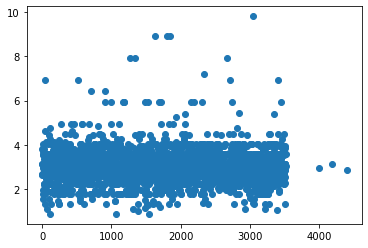

In [478]:
plt.scatter( [i for i in range(len(df05.bweight.values))],df05.bweight.values*0.45)

In [479]:
mild, extreme=iqr(df05.bweight)

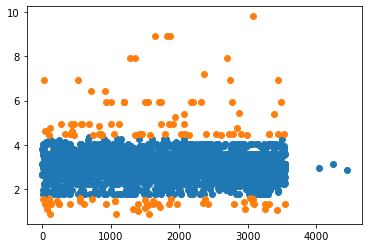

In [480]:
no_outliers=df05.bweight.drop(mild)
plt.scatter( no_outliers.index,no_outliers.values*0.45)
plt.scatter( df05.bweight[mild].index,df05.bweight[mild].values*0.45)

ValueError: x and y must be the same size

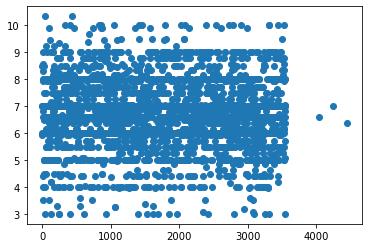

In [481]:
no_outliers=df05.bweight.drop(extreme)
plt.scatter( no_outliers.index,no_outliers.values)
plt.scatter( df05.bweight[extreme].index ,df05.bweight[exteme].values)

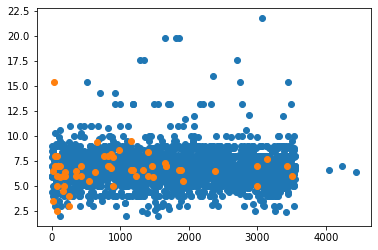

In [431]:
sigma_indexes=sigma3(df05[col])
no_outliers=df05.bweight.drop(sigma_indexes)
plt.scatter( no_outliers.index,no_outliers.values)
plt.scatter( df05.bweight[sigma_indexes].index,df05.bweight[sigma_indexes].values)

## FEINA 06-05

### Imputar NaNs per valors familiars

In [493]:
df1[df1.vitamiron_06.isna()]

,hogarid_old,cp_old,unique_05,s1age_head_05,s1hhsize_05,s1hhsz_undr5_05,s1hhsz_5_14_05,s1hhsz_15_24_05,s1hhsz_25_64_05,s1hhsz_65plus_05,...,com_vit_05,com_deworm_05,com_notvip,sample06,vitamiron_06,weighted_05,propfood_05,prstap_f_05,pranimalprot_f_05,prfruitveg_f_05
0,70053101,NaN,2035715.0,30.0,4.0,0.0,2.0,0.0,2.0,0.0,...,0.925926,0.629630,0.176471,0.0,NaN,NaN,0.764443,0.436193,0.390191,0.062652
5,70053701,12.0,2040712.0,49.0,12.0,1.0,5.0,2.0,3.0,0.0,...,0.861111,0.500000,0.300000,0.0,NaN,NaN,0.527724,0.418402,0.122034,0.135109
35,70058001,8.0,2040712.0,33.0,8.0,1.0,4.0,1.0,2.0,0.0,...,0.861111,0.500000,0.300000,0.0,NaN,1.0,0.726017,0.555108,0.022186,0.261227
54,70059901,NaN,2035715.0,55.0,8.0,0.0,0.0,4.0,4.0,0.0,...,0.925926,0.629630,0.176471,0.0,NaN,NaN,0.641540,0.184782,0.187425,0.104125
58,70060001,10.0,2035745.0,44.0,16.0,3.0,6.0,5.0,2.0,0.0,...,0.350000,0.250000,0.600000,0.0,NaN,1.0,0.753164,0.439847,0.219924,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,70349001,NaN,2035741.0,47.0,10.0,1.0,2.0,3.0,4.0,0.0,...,0.872340,0.638298,0.105263,0.0,NaN,NaN,0.862824,0.562769,0.021828,0.000000
4507,70468301,NaN,2505792.0,51.0,5.0,0.0,0.0,3.0,2.0,0.0,...,0.869565,0.608696,0.100000,0.0,NaN,NaN,0.733073,0.717335,0.112550,0.055846
4508,70081701,NaN,2035703.0,32.0,3.0,0.0,1.0,1.0,1.0,0.0,...,1.000000,1.000000,0.000000,0.0,NaN,NaN,0.871933,0.357003,0.419131,0.012866
4509,70147901,NaN,2045721.0,25.0,4.0,2.0,0.0,1.0,1.0,0.0,...,0.914894,0.744681,0.400000,0.0,NaN,NaN,0.658000,0.731997,0.231074,0.002110


In [497]:
df1[df1.vitamiron_06.isna()==False]

,hogarid_old,cp_old,unique_05,s1age_head_05,s1hhsize_05,s1hhsz_undr5_05,s1hhsz_5_14_05,s1hhsz_15_24_05,s1hhsz_25_64_05,s1hhsz_65plus_05,...,com_vit_05,com_deworm_05,com_notvip,sample06,vitamiron_06,weighted_05,propfood_05,prstap_f_05,pranimalprot_f_05,prfruitveg_f_05
1,70053301,5.0,2035707.0,35.0,5.0,1.0,2.0,0.0,2.0,0.0,...,0.571429,0.285714,0.500000,1.0,0.0,1.0,0.678527,0.204472,0.674387,0.000000
2,70053401,8.0,2035700.0,56.0,8.0,1.0,1.0,3.0,3.0,0.0,...,0.685714,0.628571,0.250000,1.0,1.0,1.0,0.560299,0.706687,0.046980,0.009460
3,70053701,7.0,2040712.0,49.0,12.0,1.0,5.0,2.0,3.0,0.0,...,0.861111,0.500000,0.300000,1.0,1.0,1.0,0.527724,0.418402,0.122034,0.135109
4,70053701,10.0,2040712.0,49.0,12.0,1.0,5.0,2.0,3.0,0.0,...,0.861111,0.500000,0.300000,1.0,1.0,0.0,0.527724,0.418402,0.122034,0.135109
6,70053901,5.0,2040712.0,31.0,5.0,1.0,2.0,0.0,2.0,0.0,...,0.861111,0.500000,0.300000,1.0,1.0,1.0,0.450707,0.737649,0.037743,0.067608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,70489401,7.0,2505774.0,52.0,8.0,1.0,1.0,3.0,3.0,0.0,...,0.720000,0.600000,0.000000,1.0,0.0,0.0,0.575694,0.584656,0.043516,0.047044
3545,70489501,4.0,2505774.0,31.0,5.0,2.0,1.0,0.0,2.0,0.0,...,0.720000,0.600000,0.000000,1.0,1.0,1.0,0.574574,0.674472,0.037236,0.054894
3546,70489501,3.0,2505774.0,31.0,5.0,2.0,1.0,0.0,2.0,0.0,...,0.720000,0.600000,0.000000,1.0,1.0,1.0,0.574574,0.674472,0.037236,0.054894
3547,70490101,7.0,2035723.0,49.0,7.0,1.0,1.0,3.0,2.0,0.0,...,0.828829,0.603604,0.233333,1.0,1.0,1.0,0.696731,0.713329,0.092144,0.033274


In [502]:
famili_vit_means=[np.nanmean(df1[df1.hogarid_old==familia].vitamiron_06.values) for familia in df1.hogarid_old]

C:\Users\Usuari\AppData\Local\Temp\ipykernel_15200\3407390028.py:1: RuntimeWarning: Mean of empty slice
  famili_vit_means=[np.nanmean(df1[df1.hogarid_old==familia].vitamiron_06.values) for familia in df1.hogarid_old]


In [508]:
famili_vit_means.count(0.5)

412

### PRIMERA IMPLEMETACIO PIPELINE DECIDIDA TONI-JAUME

In [509]:
df05.isna().sum()

bweight               1598
s4p7_parasite_i_06    1149
cpmom_06              1187
T                        0
male                     0
TREAT1                   0
TREAT2                   0
TREAT3                   0
TREAT4                   0
ed_mom                 257
MUN1                     0
MUN2                     0
MUN3                     0
MUN4                     0
MUN5                     0
MUN6                     0
com_haz_05               0
com_waz_05               0
com_tvip_05              0
com_control_05           0
com_vit_05               0
com_deworm_05            0
com_notvip               0
sample06                 0
vitamiron_06          1148
weighted_05           1866
propfood_05            127
prstap_f_05             18
pranimalprot_f_05       18
prfruitveg_f_05         18
dtype: int64

In [528]:
nan_rows=df05[df1.age_transfer<-11].index
dftj=df05.drop(nan_rows)
dftj1=df1.drop(nan_rows)

In [511]:
dftj.isna().sum()

bweight                757
s4p7_parasite_i_06     311
cpmom_06               349
T                        0
male                     0
TREAT1                   0
TREAT2                   0
TREAT3                   0
TREAT4                   0
ed_mom                 257
MUN1                     0
MUN2                     0
MUN3                     0
MUN4                     0
MUN5                     0
MUN6                     0
com_haz_05               0
com_waz_05               0
com_tvip_05              0
com_control_05           0
com_vit_05               0
com_deworm_05            0
com_notvip               0
sample06                 0
vitamiron_06           310
weighted_05           1026
propfood_05            127
prstap_f_05             13
pranimalprot_f_05       13
prfruitveg_f_05         13
dtype: int64

In [553]:
famili_vit_means=[df1[df1.hogarid_old==familia].cpmom_06 .values for familia in df1.hogarid_old]

In [554]:
famili_vit_means

[array([2.]),
 array([2.]),
 array([ 7., nan, nan]),
 array([2., 8., 8.]),
 array([2., 8., 8.]),
 array([2., 8., 8.]),
 array([2.]),
 array([2.]),
 array([ 2., nan, nan]),
 array([nan]),
 array([2.]),
 array([2., 2.]),
 array([2., 2.]),
 array([ 8., 10.]),
 array([ 8., 10.]),
 array([nan]),
 array([ 2.,  2., nan]),
 array([ 2.,  2., nan]),
 array([ 2.,  2., nan]),
 array([ 2.,  2., nan]),
 array([ 2.,  2., nan]),
 array([ 2.,  2., nan]),
 array([ 7., nan]),
 array([2.]),
 array([2.]),
 array([5.]),
 array([2.]),
 array([4.]),
 array([2., 2.]),
 array([2., 2.]),
 array([2., 2.]),
 array([2., 2.]),
 array([2.]),
 array([2., 2.]),
 array([2., 2.]),
 array([nan]),
 array([ 2., nan]),
 array([2., 2.]),
 array([2., 2.]),
 array([2., 2.]),
 array([2., 2.]),
 array([2., 2., 2.]),
 array([2., 2., 2.]),
 array([2., 2., 2.]),
 array([ 4.,  4., nan]),
 array([ 4.,  4., nan]),
 array([2., 2.]),
 array([2., 2.]),
 array([3., 3.]),
 array([3., 3.]),
 array([4.]),
 array([3.]),
 array([2., 2.]),
 arra

cp_mom no TE SENTIT!!!!!!!!! CP ENTRE 1 I 18, L'ELIMINEM

In [529]:
family_ed_mom=[dftj1[dftj1.hogarid_old==familia].ed_mom .values for familia in dftj1.hogarid_old]

In [530]:
len([1 for row in family_ed_mom if((len(row)>1)&(np.sum(np.isnan(row))>0))])

240

In [531]:
propfood_ed_mom=[dftj1[dftj1.hogarid_old==familia].propfood_05.values for familia in dftj1.hogarid_old]

In [534]:
propfood_ed_mom

[array([0.7644426], dtype=float32),
 array([0.6785266], dtype=float32),
 array([0.560299, 0.560299], dtype=float32),
 array([0.52772355, 0.52772355, 0.52772355], dtype=float32),
 array([0.52772355, 0.52772355, 0.52772355], dtype=float32),
 array([0.52772355, 0.52772355, 0.52772355], dtype=float32),
 array([0.4507071], dtype=float32),
 array([0.69647026], dtype=float32),
 array([0.7674493], dtype=float32),
 array([0.5595645], dtype=float32),
 array([0.9108367], dtype=float32),
 array([0.71700424, 0.71700424], dtype=float32),
 array([0.71700424, 0.71700424], dtype=float32),
 array([       nan, 0.78315145], dtype=float32),
 array([       nan, 0.78315145], dtype=float32),
 array([0.6926359], dtype=float32),
 array([0.6839203, 0.6839203], dtype=float32),
 array([0.6839203, 0.6839203], dtype=float32),
 array([0.6173071, 0.6173071], dtype=float32),
 array([0.6173071, 0.6173071], dtype=float32),
 array([0.5445193, 0.5445193], dtype=float32),
 array([0.5445193, 0.5445193], dtype=float32),
 arra

## Mirem distribucions

In [536]:
dftj_num=dftj[["bweight","ed_mom","com_haz_05","com_waz_05","com_tvip_05","com_control_05","com_vit_05",
              "com_deworm_05","com_notvip","sample06","propfood_05","prstap_f_05","pranimalprot_f_05","prfruitveg_f_05"]]

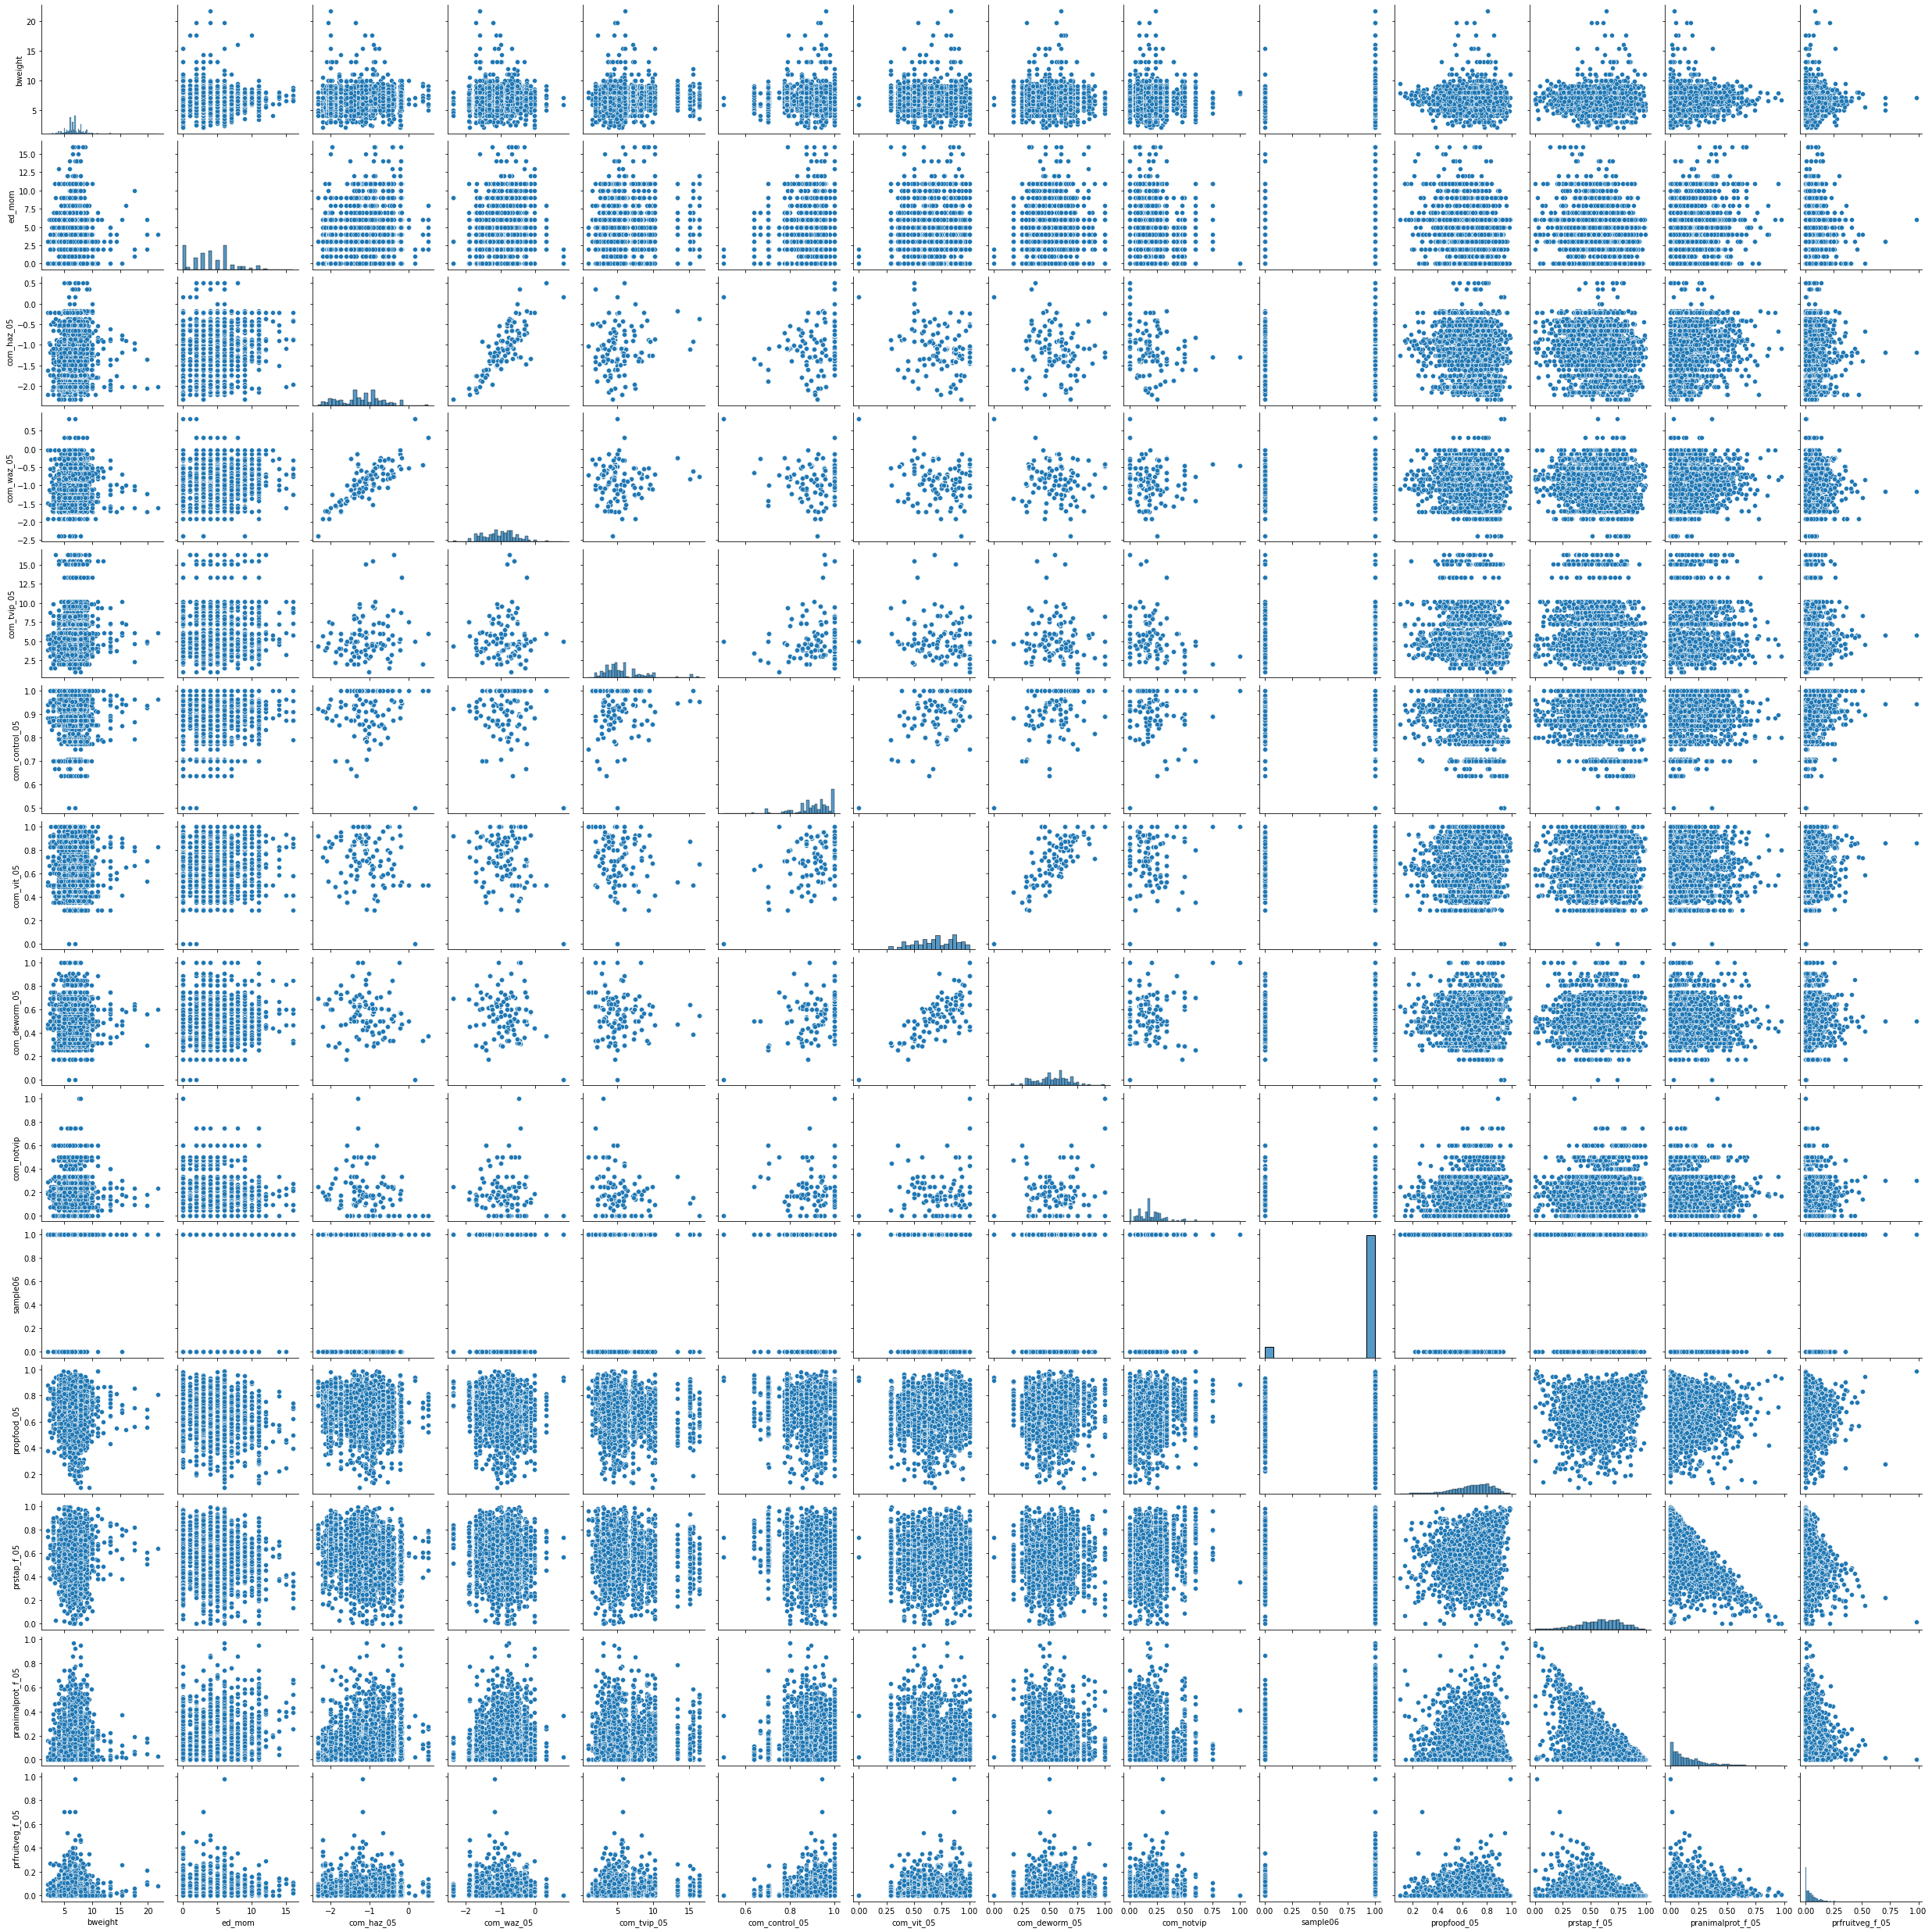

In [537]:
sns.pairplot(dftj_num)